In [15]:
import sys
sys.path.append("/home/daniel/repos/roads/src")
import glob
import skimage.io as io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import xmltodict
import cv2
from utils.utils import get_simplified_annotation_for_image

In [16]:
train_imgs = glob.glob("/home/daniel/repos/roads/datasets/train/images/**.jpg")

In [17]:
%matplotlib widget

In [18]:
@widgets.interact
def printcoords(img_path = (0,len(train_imgs)-1,1)):
    img_path = train_imgs[img_path]
    print(img_path, "\n", get_simplified_annotation_for_image(img_path))

interactive(children=(IntSlider(value=3687, description='img_path', max=7375), Output()), _dom_classes=('widge…

In [19]:
len(train_imgs)

7376

In [24]:
class ImageViewer():
    def __init__(self, path = "/home/daniel/repos/roaddamage/datasets/train/images"):
        self.image_paths = self.get_image_paths(path)
        self.img_index = 0
        self.setup_ui()
        self.show_img()
        
        
    def get_image_paths(self, path):
        paths = glob.glob(path+"/**.jpg")
        paths.sort()
        return paths

    def load_image(self, path):
        img = io.imread(path)
        return img
    
    def next(self, _):
        if self.img_index < len(self.image_paths):
            self.img_index+=1
        self.show_img()

    def prev(self, _):
        if self.img_index >1:
            self.img_index-=1
        self.show_img()

    def specific_image(self, sliderval):
        self.img_index = self.slider_ix.value
        self.show_img()

    def draw_xml_annotations(self, img, annotations):
        cmap = {"D00": (255,0,0), "D10": (0,255,0), "D20":(0,0,255), "D30": (255,0,255)}
        for annotation in annotations["objects"]:
            xmin = annotation["coords"]["xmin"]
            ymin = annotation["coords"]["ymin"]
            xmax = annotation["coords"]["xmax"]
            ymax = annotation["coords"]["ymax"]
            img = cv2.rectangle(img,  (xmin, ymin), (xmax, ymax), cmap[annotation["class"]], 4)
            img = cv2.putText(img, annotation["class"], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, cmap[annotation["class"]],2)
        return img

    def draw_yolo_annotations(self, img, annotations):
        
        
    def show_img(self):
        path = self.image_paths[self.img_index]
        img = self.load_image(path)
        sa = get_simplified_annotation_for_image(path)
        img = self.draw_annotations(img, sa)
        self.label.value = f"{sa}"
        self.ax.set_title(path)
        self.img_obj.set_data(img)
        self.fig.canvas.draw()
        self.slider_ix.value = self.img_index

    def create_figure(self):
        plt.ioff()
        self.fig, self.ax = plt.subplots(figsize = (10,10), constrained_layout = True)
        self.ax.set_title("ImageViewer")
        img = self.load_image(self.image_paths[123])
        self.img_obj = self.ax.imshow(img)           
        self.fig.show()

    def setup_ui(self):
        figure_out = self.create_figure()
        button_next = widgets.Button(description = "Next ->")
        button_prev = widgets.Button(description = "<- Prev")
        self.slider_ix = widgets.IntSlider(description = "Image Index", val = self.img_index, min = 0, max = len(self.image_paths), continuous_update=False)
        self.slider_ix.observe(self.specific_image, names = "value")
        button_next.on_click(self.next)
        button_prev.on_click(self.prev)
        self.label = widgets.Label(value = "ImageViewer")
        hbox = widgets.HBox([button_prev, self.slider_ix,  button_next])
        vbox = widgets.VBox([self.label, hbox])
        display(vbox)

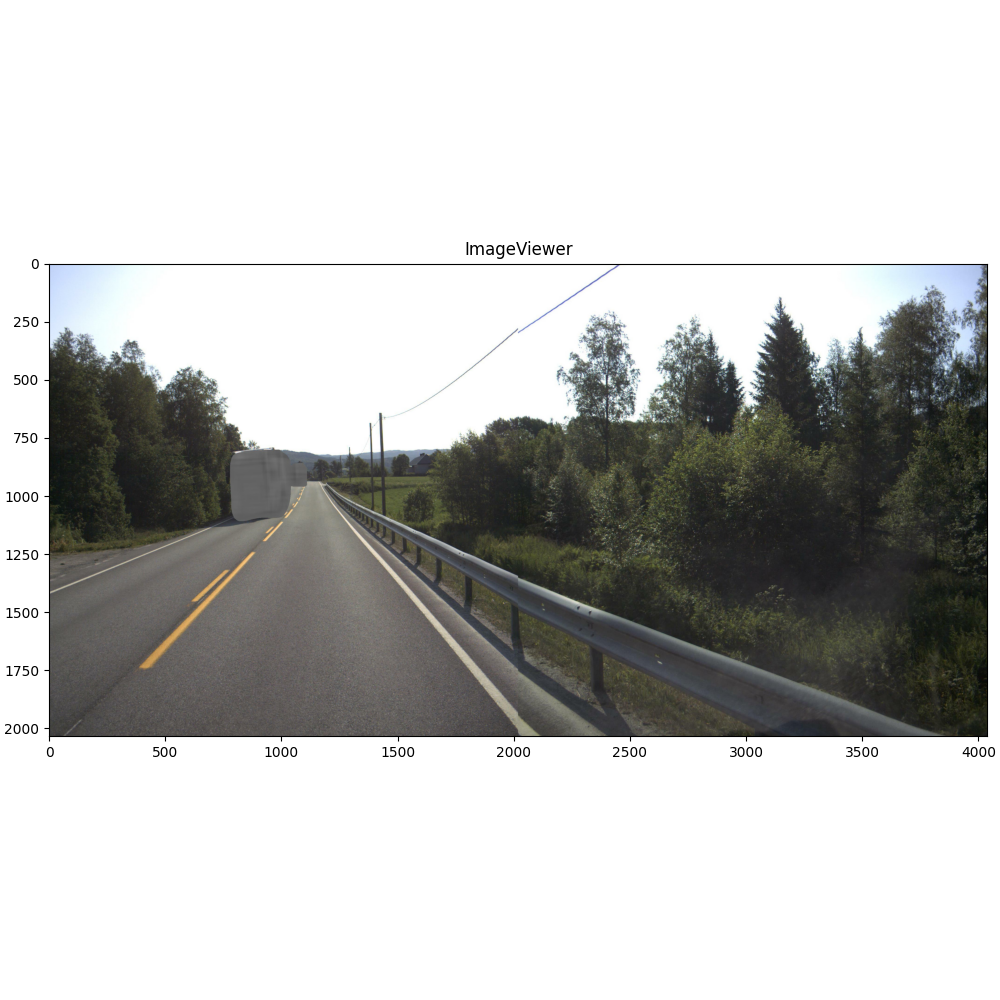

In [25]:
ImageViewer()

In [ ]:
get_annotation_xml("./Norway/train/images/Norway_000024.jpg")